In [1]:
import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

d:\codeproj\bstu\sklearn\labs\venv\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
d:\codeproj\bstu\sklearn\labs\venv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Признак 1')

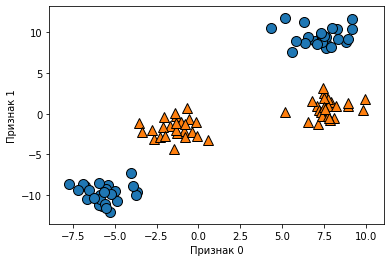

In [2]:
x, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

d:\codeproj\bstu\sklearn\labs\venv\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Признак 1')

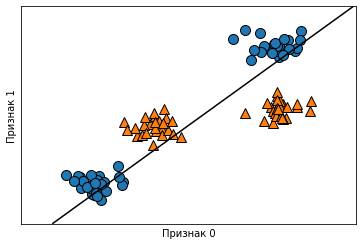

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(x, y)
mglearn.plots.plot_2d_separator(linear_svm, x)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

Text(0.5, 0, 'признак1 ** 2')

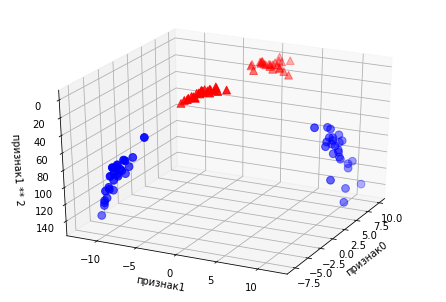

In [4]:
import numpy as np
X_new = np.hstack([x, x[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel("признак0") 
ax.set_ylabel("признак1") 
ax.set_zlabel("признак1 ** 2")

d:\codeproj\bstu\sklearn\labs\venv\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, 'признак1 ** 2')

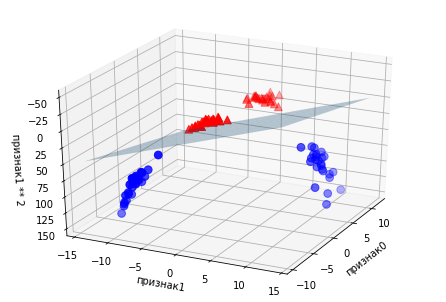

In [5]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50) 
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy) 
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2")


Text(0, 0.5, 'Признак 1')

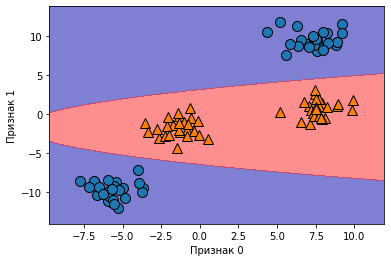

In [6]:
ZZ=YY**2

dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]) 
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")


Text(0, 0.5, 'Признак 1')

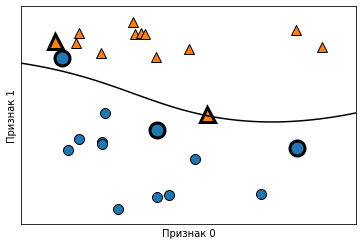

In [9]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3) 
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

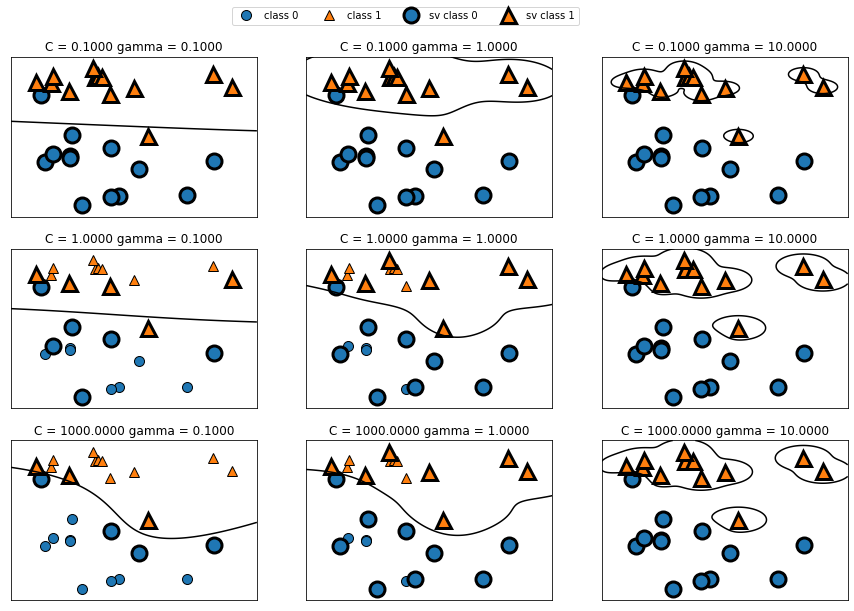

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(svc.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(svc.score(X_test, y_test)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.94


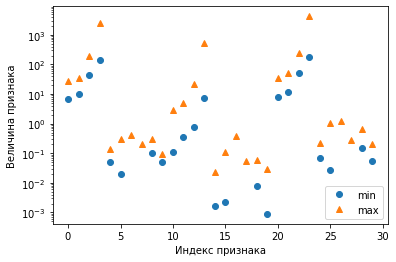

In [19]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Индекс признака")
plt.ylabel("Величина признака")
plt.yscale("log")

In [21]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Минимальное значение для каждого признака\n{}".format(X_train_scaled.min(axis=0)))
print("Максимальное значение для каждого признака\n {}".format(X_train_scaled.max(axis=0)))

Минимальное значение для каждого признака
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Максимальное значение для каждого признака
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [23]:
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format( svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.984
Правильность на тестовом наборе: 0.972


In [24]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format( svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.958
